In [12]:
import numpy as np 
from skimage.feature.texture import greycomatrix, greycoprops
import cv2
import os
import matplotlib.pyplot as plt

In [13]:
def Legendre_pol(p,x):
    # base case 
    if(p==1):
        return x 
    elif p == 0:
        return 1 
    else: 
        res = ((2*p -1)/p)*x*Legendre_pol(p-1,x) - ((p-1)/p)*Legendre_pol(p-2,x)
        return res
    

def Legendre_moments(p,q,img):
    M = img.shape[0]
    N = img.shape[1]
    Lam_pq = ((2*p + 1)*(2*q + 1))/(M*N)
    L_pq = 0
    for i in range(M):
        for j in range(N):
            x_hat = (2*i - M + 1)/(M-1)
            y_hat = (2*j - N + 1)/(N-1)
            L_pq += Legendre_pol(p,x_hat)*Legendre_pol(q,y_hat)*img[i,j]
    return Lam_pq*L_pq



def leg_tuple(level):
    res = []
    for i in range(level + 1):
        for j in range(level + 1):
            if i +j <=level:
                res.append((i,j))
    return res


def Legendre_vector(img, level):
    res = []
    tup = leg_tuple(level)
    for i in range(3):
        im = img[:,:,i]
        for t in tup:
            res.append(Legendre_moments(t[0],t[1],im))
    return np.array(res)      
        
        
    

In [14]:
def co_occurrence_vector(img, distance = [1], direction = [0, np.pi/2, 3*np.pi/2]):
    res = []
    for i in range(3):
        im = img[:,:,i]
        co_matrix = greycomatrix(im, distance, direction, levels=256)
        contrast = greycoprops(co_matrix, 'contrast')
        dissimilarity = greycoprops(co_matrix, 'dissimilarity')
        homogeneity = greycoprops(co_matrix,  'homogeneity')
        energy = greycoprops(co_matrix, 'energy')
        correlation = greycoprops(co_matrix, 'correlation')
        ASM = greycoprops(co_matrix, 'ASM')
        total = np.concatenate([contrast,dissimilarity,homogeneity,energy,correlation,ASM],axis = 1)
        res.append(total)
    return np.array(res).ravel()





def color_hist_vector(img, bins = 16):
    res = []
    for i in range(3):
        im =img[:,:,i]
        M = im.shape[0]
        N = im.shape[1]      
        c = plt.hist(img.ravel(), bins=16)   
        norm = np.linalg.norm(c[0])
        hist_norm = c[0]/norm
        res.append(hist_norm)
    return np.array(res).ravel()
    


In [15]:
def total_feature(img, level = 3, bins = 16, distance = [1], direction = [0, np.pi/2, 3*np.pi/2]):
    legendre = Legendre_vector(img,level)
    histograms = color_hist_vector(img,  bins = bins)
    co_occurrence = co_occurrence_vector(img,distance = distance, direction = direction)
    return np.concatenate([legendre,histograms,co_occurrence])

********************  Arthonia_radiata_texture.jpg  ***********************
********************  Flavoparmelia_soredians_texture1.jpg  ***********************
********************  Phlyctis_argena_texture1.jpg  ***********************
********************  Pertusaria_amara_texture1.jpg  ***********************
********************  Caloplaca_cerina_texture1.jpg  ***********************
********************  Xanthomendoza_fallax_texture.jpg  ***********************
********************  Flavoparmelia_soredians_texture2.jpg  ***********************
********************  Phlyctis_argena_texture2.jpg  ***********************
********************  Pertusaria_amara_texture2.jpg  ***********************
********************  Caloplaca_cerina_texture2.jpg  ***********************
********************  Lecidella_elaeochroma_texture1.jpg  ***********************
********************  Physcia_aipolia_texture.jpg  ***********************
********************  Lecanora_argentata_texture2.jpg  ****

NameError: name 'numpy' is not defined

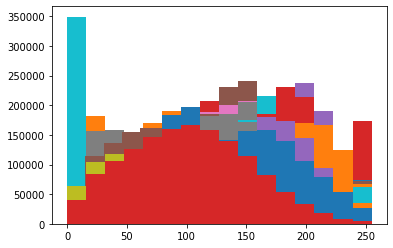

In [18]:
lista_texture = os.listdir(("../../texture"))
res = []
name = []
for texture in lista_immagini:
    print("******************** ",texture," ***********************")
    img = cv2.imread("../../texture/" + texture)
    feat = total_feature(img)
    res.append(feat)
    name.append(texture.split(".jpg")[0])

numpy.save("texture_feature",np.array(res))
numpy.save("name_texture",np.array(name))
    

In [19]:
np.save("texture_feature",np.array(res))
np.save("name_texture",np.array(name))
    

# DISTANCE

In [27]:
texture = np.load("texture_feature.npy")
name = np.load("name_texture.npy")

In [26]:
from scipy.stats import wasserstein_distance

33.63738063540383

In [41]:
def chi2_distance(A, B):   
    # compute the chi-squared distance using above formula 
    chi = 0.5 * np.sum([((a - b) * (a-b)) / (a + b)  for (a, b) in zip(A, B)])   
    return chi 
  

In [55]:
print(name[-1])
print(name[-5])

Hyperphyscia_adglutinata_texture2
Physcia_biziana_texture2


In [46]:
np.linalg.norm(texture[2] - texture[7])

104.17081922671434